In [6]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [7]:
%%bash
cd .. && make clean && make

In [8]:
config_name = 'step'
conf = load_conf(config_name)

In [17]:
# Contains tuple of:
# - params
# - data_pot
# - data_psi2[ |Φ|, Re{Φ}, Im{Φ} ]
# - data_obs[t, prob, prob, E, xmoy, x2moy, pmoy, p2moy]
E = 1283.20379625  # Energy of particle with 0 potential
dataset = run_with_params(
    config_name,
    gen_variations({
        'V0': [E/2, E, E*1.5]
    })
)

Running simulations... Done 3/3


In [14]:
def extract(dataset: tuple[dict, np.ndarray, np.ndarray, np.ndarray]) -> tuple[np.ndarray, ...]:
    params, data_pot, data_psi2, data_obs = dataset
    x = data_pot[:,0]
    t = data_obs[:,0]
    prob_left = data_obs[:,1]
    prob_right = data_obs[:,2]
    H_moy = data_obs[:,3]
    x_moy = data_obs[:,4]
    x2_moy = data_obs[:,5]
    p_moy = data_obs[:,6]
    p2_moy = data_obs[:,7]

    delta_x = np.sqrt(x2_moy - x_moy**2)
    delta_p = np.sqrt(p2_moy - p_moy**2)

    return x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p

# Plots!

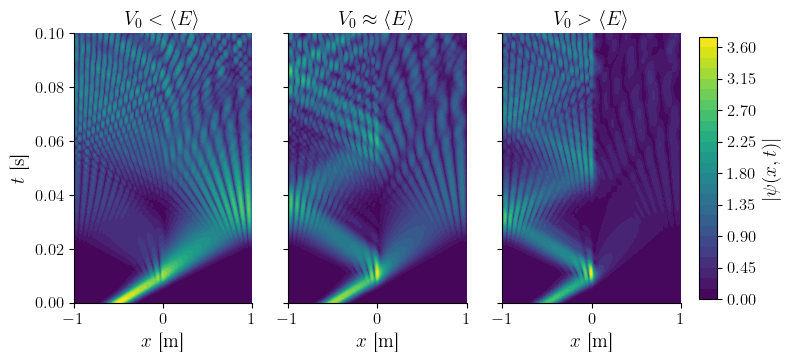

In [19]:
%matplotlib inline

fig, feur = plt.subplots(1, 3, figsize=(9, 3.5), sharey=True)
ax: list[plt.Axes] = feur
magic = [r'<', r'\approx', r'>']
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    X, Y = np.meshgrid(x, t)
    im = ax[i].contourf(X, Y, np.sqrt(data_psi2[:,::3]), levels=32)
    ax[i].set_xlabel(r'$x$ [m]')
    ax[i].set_title(f'$V_0 {magic[i]} \\langle E \\rangle$')

ax[0].set_ylabel(r'$t$ [s]')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.02, 0.75])
fig.colorbar(im, cax=cbar_ax).set_label(r'$|\psi(x,t)|$')

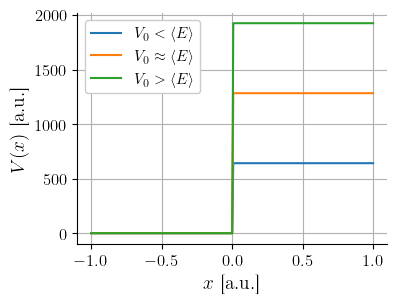

In [30]:
%matplotlib inline
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    plt.plot(data_pot[:,0], data_pot[:,1], label=f'$V_0 {magic[i]} \\langle E \\rangle$')

plt.xlabel(r'$x$ [a.u.]')
plt.ylabel(r'$V(x)$ [a.u.]')
plt.legend()
plt.grid()

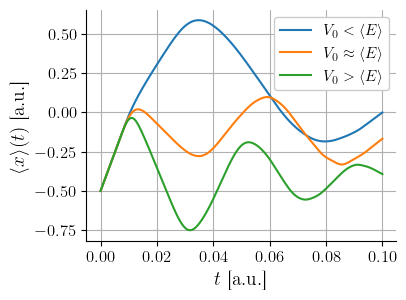

In [32]:
%matplotlib inline

for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    plt.plot(t, x_moy, label=f'$V_0 {magic[i]} \\langle E \\rangle$')

plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$\langle x \rangle(t)$ [a.u.]')
plt.legend()
plt.grid()
# plt.savefig(export_path + 'i_xmoy.pdf')

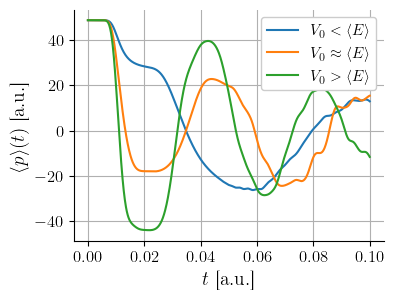

In [35]:
%matplotlib inline
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    plt.plot(t, p_moy, label=f'$V_0 {magic[i]} \\langle E \\rangle$')
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$\langle p \rangle(t)$ [a.u.]')
plt.legend()
plt.grid()
# plt.savefig(export_path + 'i_pmoy.pdf')

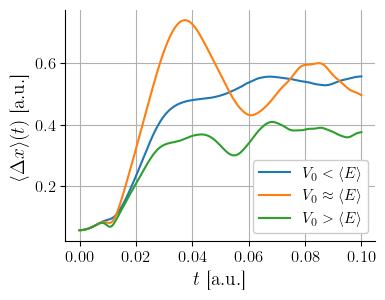

In [36]:
%matplotlib inline
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    plt.plot(t, delta_x, label=f'$V_0 {magic[i]} \\langle E \\rangle$')
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$\langle \Delta x \rangle(t)$ [a.u.]')
plt.legend()
plt.grid()
# plt.savefig(export_path + 'i_deltax.pdf')

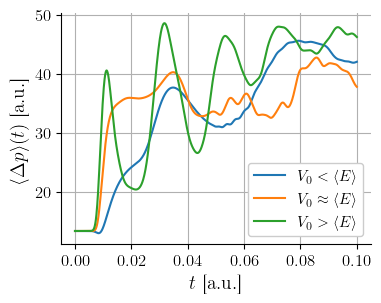

In [37]:
%matplotlib inline
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    plt.plot(t, delta_p, label=f'$V_0 {magic[i]} \\langle E \\rangle$')
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$\langle \Delta p \rangle(t)$ [a.u.]')
plt.legend()
plt.grid()
# plt.savefig(export_path + 'i_deltap.pdf')

Minimum distance: 0.25565124408531426


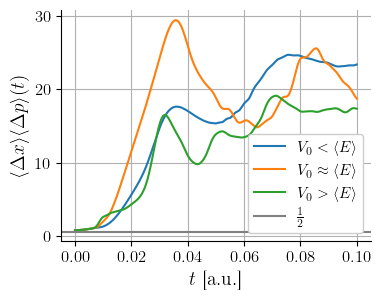

In [38]:
%matplotlib inline
for i, (params, data_pot, data_psi2, data_obs) in enumerate(dataset):
    x, t, prob_left, prob_right, H_moy, x_moy, x2_moy, p_moy, p2_moy, delta_x, delta_p = \
        extract((params, data_pot, data_psi2, data_obs))
    plt.plot(t, delta_x*delta_p, label=f'$V_0 {magic[i]} \\langle E \\rangle$')

print(f'Minimum distance: {np.min(delta_x * delta_p) - 1/2}')

plt.axhline(1/2, label=r'$\frac{1}{2}$')
plt.xlabel(r'$t$ [a.u.]')
plt.ylabel(r'$\langle \Delta x \rangle \langle \Delta p \rangle (t)$')
plt.legend()
plt.grid()
# plt.savefig(export_path + 'i_heisenberg.pdf')